In [1]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.family'] = 'Malgun Gothic'
matplotlib.rcParams['font.size'] = 15
matplotlib.rcParams['axes.unicode_minus'] = False

In [2]:
import pandas as pd
import numpy as np
df = pd.read_excel('owid-covid-data.xlsx', usecols='C:E')
df.rename(columns={'location':'국가','date':'일자', 'total_cases':'확진자'}, inplace=True)
df = df.fillna(0)
df['일자'] = pd.to_datetime(df['일자'])
df['일자'] = df['일자'].dt.strftime('%y.%m.%d')
df = df[df['일자'] == '22.09.06']
df['확진자'] = df['확진자'].astype(int)
df

,국가,일자,확진자
925,Afghanistan,22.09.06,194614
1862,Africa,22.09.06,12333163
2787,Albania,22.09.06,330283
3712,Algeria,22.09.06,270476
4631,Andorra,22.09.06,46027
...,...,...,...
210832,Wallis and Futuna,22.09.06,761
211792,World,22.09.06,606186060
212672,Yemen,22.09.06,11931
213575,Zambia,22.09.06,333124


In [3]:
continents = ['Africa', 'Asia', 'Europe', 'European Union', 'High income', 'Upper middle income', 'Low income', 
              'Lower middle income', 'North America', 'South Africa', 'South America', 'World']
filt = df['국가'].isin(continents)
df = df[~filt]
df

,국가,일자,확진자
925,Afghanistan,22.09.06,194614
2787,Albania,22.09.06,330283
3712,Algeria,22.09.06,270476
4631,Andorra,22.09.06,46027
5532,Angola,22.09.06,102636
...,...,...,...
210144,Vietnam,22.09.06,11424754
210832,Wallis and Futuna,22.09.06,761
212672,Yemen,22.09.06,11931
213575,Zambia,22.09.06,333124


In [4]:
df = df.sort_values(by=['확진자'], ascending=0)
df_top = df.head(10)
df_top

,국가,일자,확진자
203107,United States,22.09.06,94896544
89161,India,22.09.06,44469661
68480,France,22.09.06,34685277
27592,Brazil,22.09.06,34477539
73077,Germany,22.09.06,32344032
180160,South Korea,22.09.06,23791961
202148,United Kingdom,22.09.06,23521792
96582,Italy,22.09.06,21969725
98451,Japan,22.09.06,19640667
160197,Russia,22.09.06,19521190


In [5]:
df_etc = df.iloc[10:]
df_etc

,국가,일자,확진자
196711,Turkey,22.09.06,16797750
181994,Spain,22.09.06,13358364
146543,Oceania,22.09.06,12217171
210144,Vietnam,22.09.06,11424754
12082,Australia,22.09.06,10095000
...,...,...,...
210832,Wallis and Futuna,22.09.06,761
91023,International,22.09.06,721
208279,Vatican,22.09.06,29
161834,Saint Helena,22.09.06,7


In [6]:
df_top.set_index('국가', inplace=True)

In [7]:
df_top.loc['ETC'] = ['22.09.06', df_etc['확진자'].sum()]

C:\Users\user\AppData\Local\Temp\ipykernel_2328\3842875949.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top.loc['ETC'] = ['22.09.06', df_etc['확진자'].sum()]


In [8]:
df_top

,일자,확진자
국가,,
United States,22.09.06,94896544
India,22.09.06,44469661
France,22.09.06,34685277
Brazil,22.09.06,34477539
Germany,22.09.06,32344032
South Korea,22.09.06,23791961
United Kingdom,22.09.06,23521792
Italy,22.09.06,21969725
Japan,22.09.06,19640667


In [9]:
df_top.reset_index(inplace=True)
df_top

,국가,일자,확진자
0,United States,22.09.06,94896544
1,India,22.09.06,44469661
2,France,22.09.06,34685277
3,Brazil,22.09.06,34477539
4,Germany,22.09.06,32344032
5,South Korea,22.09.06,23791961
6,United Kingdom,22.09.06,23521792
7,Italy,22.09.06,21969725
8,Japan,22.09.06,19640667
9,Russia,22.09.06,19521190


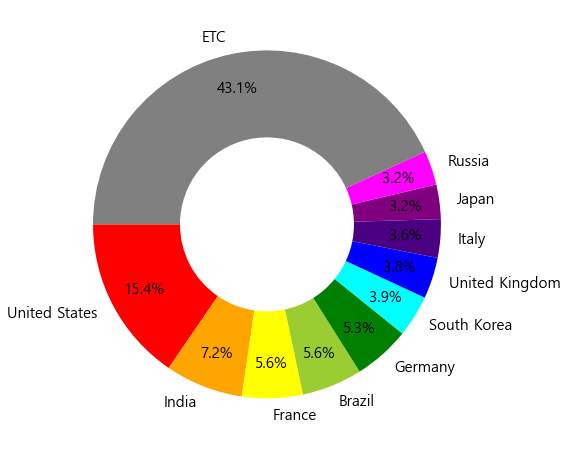

In [10]:
fig = plt.figure(figsize=(8,8))
values = df_top['확진자'].tolist()
labels = df_top['국가'].tolist()
colors = ['#ff0000', '#ffa500', '#ffff00', '#9acd32', '#008000',
          '#00ffff', '#0000ff', '#4b0082', '#800080', '#ff00ff', '#808080']
plt.pie(values, labels=labels, wedgeprops=dict(width=0.5),
        autopct = '%.1f%%', startangle=180, colors=colors, pctdistance = 0.8)
plt.show()